In [325]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [326]:
data=pd.read_csv("C:\\Users\\sooje\\Downloads\\database_08 (1).csv",index_col=0,names=(["s1","s2","s3","s4","s5"]))
data

,s1,s2,s3,s4,s5
1,back pain,headache,insomnia,NaN,NaN
2,back pain,headache,insomnia,NaN,NaN
3,fever,nausea,NaN,NaN,NaN
4,insomnia,nausea,NaN,NaN,NaN
5,back pain,fatigue,headache,insomnia,nausea
6,back pain,fatigue,headache,insomnia,NaN
7,back pain,fatigue,headache,insomnia,nausea
8,back pain,fatigue,headache,insomnia,nausea
9,back pain,fatigue,headache,insomnia,NaN
10,back pain,fatigue,headache,insomnia,nausea


In [327]:
item_base=list(set(np.concatenate(data.values)))
item_base.pop(0)

print("Item_base:",item_base)

Item_base: ['fatigue', 'insomnia', 'nausea', 'fever', 'back pain', 'headache']


In [328]:
from itertools import combinations

output = sum([list(map(list, combinations(item_base, i))) for i in range(len(item_base) + 1)], [])
output.pop(0)
len(output)

63

In [329]:
dic_count={}
for j in output:
    count=0
    for i in range(1,len(data)+1):
        d=data.loc[i]
        if(set(j).issubset(set(d))):
            count=count+1 
    j.sort()
    dic_count.update({str(j):count})
dic_count

{"['fatigue']": 19,
 "['insomnia']": 22,
 "['nausea']": 15,
 "['fever']": 9,
 "['back pain']": 26,
 "['headache']": 25,
 "['fatigue', 'insomnia']": 17,
 "['fatigue', 'nausea']": 8,
 "['fatigue', 'fever']": 3,
 "['back pain', 'fatigue']": 19,
 "['fatigue', 'headache']": 18,
 "['insomnia', 'nausea']": 9,
 "['fever', 'insomnia']": 1,
 "['back pain', 'insomnia']": 20,
 "['headache', 'insomnia']": 19,
 "['fever', 'nausea']": 7,
 "['back pain', 'nausea']": 11,
 "['headache', 'nausea']": 10,
 "['back pain', 'fever']": 7,
 "['fever', 'headache']": 6,
 "['back pain', 'headache']": 25,
 "['fatigue', 'insomnia', 'nausea']": 7,
 "['fatigue', 'fever', 'insomnia']": 1,
 "['back pain', 'fatigue', 'insomnia']": 17,
 "['fatigue', 'headache', 'insomnia']": 16,
 "['fatigue', 'fever', 'nausea']": 2,
 "['back pain', 'fatigue', 'nausea']": 8,
 "['fatigue', 'headache', 'nausea']": 7,
 "['back pain', 'fatigue', 'fever']": 3,
 "['fatigue', 'fever', 'headache']": 2,
 "['back pain', 'fatigue', 'headache']": 18,


In [330]:
dict_str={}

for i in output:
    key=len(i)
    v=str(i)
    #print(key,v)
    if key not in dict_str:
            dict_str[key] = []
            dict_str[key].append(v)
    else:
        dict_str[key].append(v)
dict={}

for i in output:
    key=len(i)
    if key not in dict:
            dict[key] = []
            dict[key].append(i)
    else:
        dict[key].append(i)

C:\Users\sooje\AppData\Roaming\Python\Python38\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


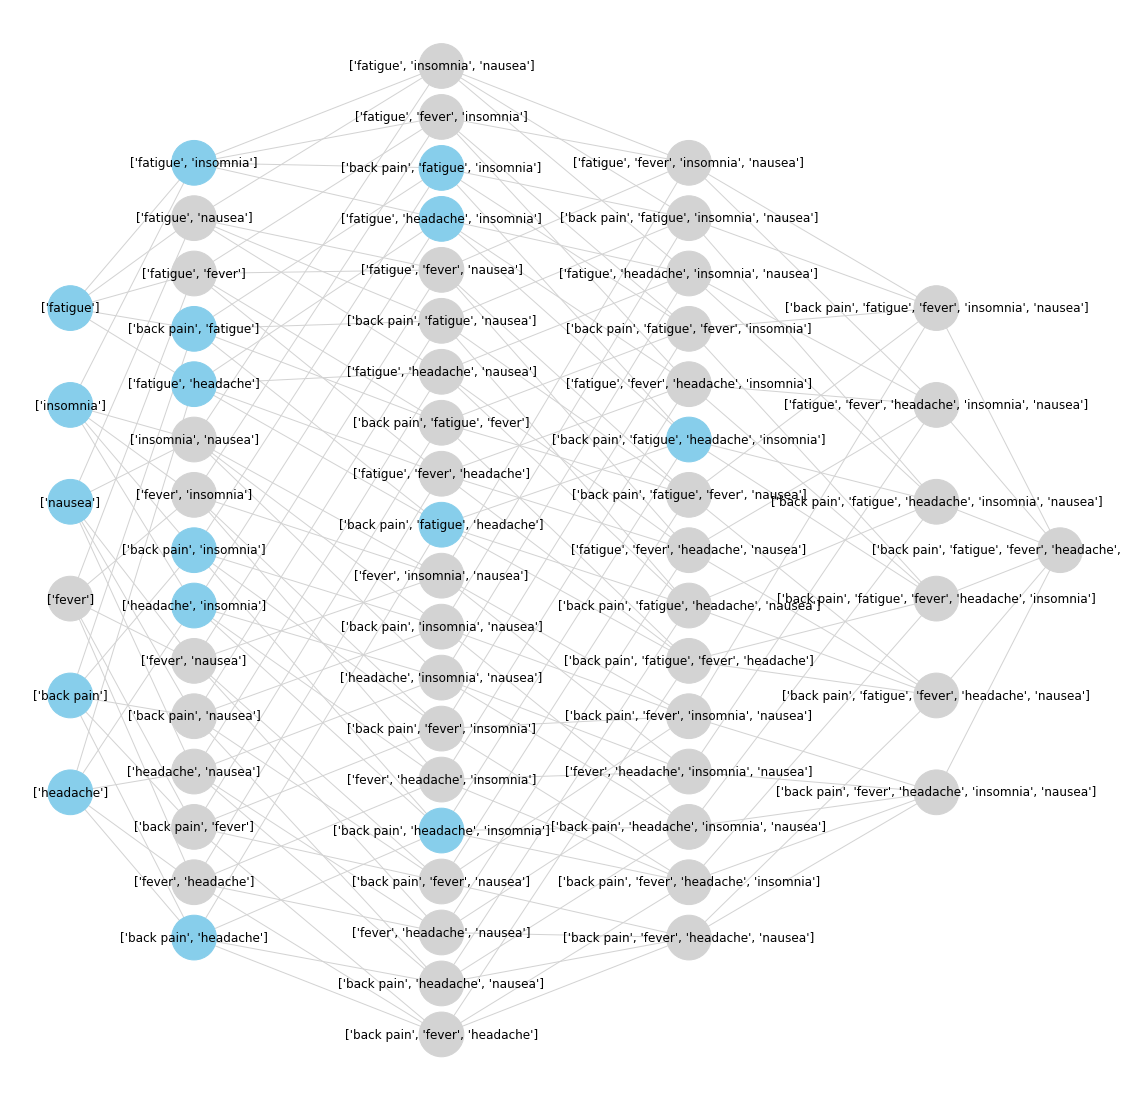

In [331]:
G = nx.Graph()

for j in output:
    G.add_node(str(j))

ed=[]
for i in range(1,6):
    for j in dict[i]:
        for k in dict[i+1]:
            if(set(j).issubset(set(k))):
                ed.append((str(j),str(k)))
                
G.add_edges_from(ed)

a1= a5=0.5
a2= a4=0.8
a3=1

s1=1/(len(dict[1])-1)
s2=1.6/(len(dict[2])-1)
s3=2/(len(dict[3])-1)
s4=1.6/(len(dict[4])-1)
s5=1/(len(dict[5])-1)
pos = nx.spring_layout(G, k=1, iterations=5)
for node in G:
    if node in dict_str[1]:
        pos[node][0]=-0.8  #horizontal
        pos[node][1]=a1  #vertical
        a1=a1-s1
    elif node in dict_str[2]:
        pos[node][0]=-0.6  #horizontal
        pos[node][1]=a2  #vertical
        a2=a2-s2
    elif node in dict_str[3]:
        pos[node][0]=-0.2  #horizontal
        pos[node][1]=a3  #vertical
        a3=a3-s3
    elif node in dict_str[4]:
        pos[node][0]=0.2  #horizontal
        pos[node][1]=a4  #vertical
        a4=a4-s4
    elif node in dict_str[5]:
        pos[node][0]=0.6  #horizontal
        pos[node][1]=a5  #vertical  
        a5=a5-s5   
    else:
        pos[node][0]=0.8  #horizontal
        pos[node][1]=0  #vertical  

color_map=[]
for node in G:
    if dic_count[node] >= 15:
        color_map.append('skyblue')
    else:
        color_map.append('lightgrey')
        
plt.subplots(figsize=(20,20))
nx.draw(G, pos, with_labels=True,edge_color='lightgrey', node_size=2000, node_color=color_map)
plt.show()   


In [332]:
df_count=pd.DataFrame(columns=["itemset","count","r_support"])
df_count
r=0
for j in output:
    count=0
    for i in range(1,len(data)+1):
        d=data.loc[i]
        if(set(j).issubset(set(d))):
            count=count+1
    j.sort()
    df_count.at[r,"itemset"]=j
    df_count.at[r,"count"]=count
    df_count.at[r,"r_support"]=count/30
    r=r+1
df_count

,itemset,count,r_support
0,[fatigue],19,0.633333
1,[insomnia],22,0.733333
2,[nausea],15,0.5
3,[fever],9,0.3
4,[back pain],26,0.866667
...,...,...,...
58,"[back pain, fatigue, headache, insomnia, nausea]",6,0.2
59,"[back pain, fatigue, fever, headache, insomnia]",0,0.0
60,"[back pain, fatigue, fever, headache, nausea]",1,0.033333
61,"[back pain, fever, headache, insomnia, nausea]",0,0.0


In [333]:
df_count.to_csv("df_count.csv")

In [334]:
df_count_true=df_count[df_count["r_support"]>=0.5]
df_count_true.reset_index(drop=True, inplace=True)
df_count_true

,itemset,count,r_support
0,[fatigue],19,0.633333
1,[insomnia],22,0.733333
2,[nausea],15,0.5
3,[back pain],26,0.866667
4,[headache],25,0.833333
5,"[fatigue, insomnia]",17,0.566667
6,"[back pain, fatigue]",19,0.633333
7,"[fatigue, headache]",18,0.6
8,"[back pain, insomnia]",20,0.666667
9,"[headache, insomnia]",19,0.633333


In [335]:
#for |consequence|=1
df_rule1=pd.DataFrame(columns=["save","Antecedent","Consequent","Support(A)","Support(AUC)","Confidence"])
r=0
for l in range(2,5):
    for i in range(len(df_count_true)):
            v=df_count_true.at[i,"itemset"].copy()
            if len(v) == l:
                for z in range(l):
                    df_rule1.at[r,"save"]=v
                    con=v[z]
                    v_copy=v.copy()
                    v_copy.pop(z)
                    ant=v_copy
                    df_rule1.at[r,"Antecedent"]=ant
                    df_rule1.at[r,"Consequent"]=con
                    va=str(ant)
                    vc=str(v)
                    df_rule1.at[r,"Support(A)"]=dic_count[va]
                    df_rule1.at[r,"Support(AUC)"]=dic_count[vc]   
                    df_rule1.at[r,"Confidence"]=dic_count[vc]/dic_count[va]
                    r=r+1

df_rule1

,save,Antecedent,Consequent,Support(A),Support(AUC),Confidence
0,"[fatigue, insomnia]",[insomnia],fatigue,22,17,0.772727
1,"[fatigue, insomnia]",[fatigue],insomnia,19,17,0.894737
2,"[back pain, fatigue]",[fatigue],back pain,19,19,1.0
3,"[back pain, fatigue]",[back pain],fatigue,26,19,0.730769
4,"[fatigue, headache]",[headache],fatigue,25,18,0.72
5,"[fatigue, headache]",[fatigue],headache,19,18,0.947368
6,"[back pain, insomnia]",[insomnia],back pain,22,20,0.909091
7,"[back pain, insomnia]",[back pain],insomnia,26,20,0.769231
8,"[headache, insomnia]",[insomnia],headache,22,19,0.863636
9,"[headache, insomnia]",[headache],insomnia,25,19,0.76


In [336]:
df_rule1_true=df_rule1[df_rule1["Confidence"]>=0.85]
df_rule1_true.reset_index(drop=True, inplace=True)
df_rule1_true

,save,Antecedent,Consequent,Support(A),Support(AUC),Confidence
0,"[fatigue, insomnia]",[fatigue],insomnia,19,17,0.894737
1,"[back pain, fatigue]",[fatigue],back pain,19,19,1.0
2,"[fatigue, headache]",[fatigue],headache,19,18,0.947368
3,"[back pain, insomnia]",[insomnia],back pain,22,20,0.909091
4,"[headache, insomnia]",[insomnia],headache,22,19,0.863636
5,"[back pain, headache]",[headache],back pain,25,25,1.0
6,"[back pain, headache]",[back pain],headache,26,25,0.961538
7,"[back pain, fatigue, insomnia]","[fatigue, insomnia]",back pain,17,17,1.0
8,"[back pain, fatigue, insomnia]","[back pain, insomnia]",fatigue,20,17,0.85
9,"[back pain, fatigue, insomnia]","[back pain, fatigue]",insomnia,19,17,0.894737


In [337]:
#for |consequence|=2
df_rule2=pd.DataFrame(columns=["save","Antecedent","Consequent","Support(A)","Support(AUC)","Confidence"])
r=0
for l in range(2,5):
    for i in range(len(df_rule1_true)):
            v=df_rule1_true.at[i,"Antecedent"].copy()
            if len(v) == l:
#                print(l,v)
                for z in range(l):
                    df_rule2.at[r,"save"]=df_rule1_true.at[i,"save"]
                    con=[v[z],df_rule1_true.at[i,"Consequent"]]
                    con.sort()
                    v_copy=v.copy()
                    v_copy.pop(z)
                    ant=v_copy
                    df_rule2.at[r,"Antecedent"]=ant
                    df_rule2.at[r,"Consequent"]=con
                    va=str(ant)
                    vc=str(df_rule2.at[r,"save"])
                    df_rule2.at[r,"Support(A)"]=dic_count[va]
                    df_rule2.at[r,"Support(AUC)"]=dic_count[vc]   
                    df_rule2.at[r,"Confidence"]=dic_count[vc]/dic_count[va]
                    r=r+1
#df_rule2

df_rule2_remove_du=df_rule2.copy()
for i in range(len(df_rule2)-1):
    for j in range(i+1,len(df_rule2)):
        if df_rule2.at[i,"Antecedent"]==df_rule2.at[j,"Antecedent"]:
            if df_rule2.at[i,"Consequent"]==df_rule2.at[j,"Consequent"]:
                df_rule2_remove_du=df_rule2_remove_du.drop(j)
df_rule2_remove_du.reset_index(drop=True, inplace=True)
df_rule2_remove_du 

,save,Antecedent,Consequent,Support(A),Support(AUC),Confidence
0,"[back pain, fatigue, insomnia]",[insomnia],"[back pain, fatigue]",22,17,0.772727
1,"[back pain, fatigue, insomnia]",[fatigue],"[back pain, insomnia]",19,17,0.894737
2,"[back pain, fatigue, insomnia]",[back pain],"[fatigue, insomnia]",26,17,0.653846
3,"[fatigue, headache, insomnia]",[insomnia],"[fatigue, headache]",22,16,0.727273
4,"[fatigue, headache, insomnia]",[fatigue],"[headache, insomnia]",19,16,0.842105
5,"[fatigue, headache, insomnia]",[headache],"[fatigue, insomnia]",25,16,0.64
6,"[back pain, fatigue, headache]",[headache],"[back pain, fatigue]",25,18,0.72
7,"[back pain, fatigue, headache]",[fatigue],"[back pain, headache]",19,18,0.947368
8,"[back pain, fatigue, headache]",[back pain],"[fatigue, headache]",26,18,0.692308
9,"[back pain, headache, insomnia]",[insomnia],"[back pain, headache]",22,19,0.863636


In [338]:
df_rule2_true=df_rule2_remove_du[df_rule2_remove_du["Confidence"]>=0.85]
df_rule2_true.reset_index(drop=True, inplace=True)
df_rule2_true

,save,Antecedent,Consequent,Support(A),Support(AUC),Confidence
0,"[back pain, fatigue, insomnia]",[fatigue],"[back pain, insomnia]",19,17,0.894737
1,"[back pain, fatigue, headache]",[fatigue],"[back pain, headache]",19,18,0.947368
2,"[back pain, headache, insomnia]",[insomnia],"[back pain, headache]",22,19,0.863636
3,"[back pain, fatigue, headache, insomnia]","[fatigue, insomnia]","[back pain, headache]",17,16,0.941176
4,"[back pain, fatigue, headache, insomnia]","[fatigue, headache]","[back pain, insomnia]",18,16,0.888889


In [341]:
#for |consequence|=3
df_rule3=pd.DataFrame(columns=["save","Antecedent","Consequent","Support(A)","Support(AUC)","Confidence"])
r=0

for i in range(len(df_rule2_true)):
        v=df_rule2_true.at[i,"Antecedent"].copy()
        if len(v) == 2:
            for z in range(2):
                df_rule3.at[r,"save"]=df_rule2_true.at[i,"save"]
                temp=df_rule2_true.at[i,"Consequent"]
                con=[v[z],temp[0],temp[1]]
                con.sort()
                v_copy=v.copy()
                v_copy.pop(z)
                ant=v_copy
                df_rule3.at[r,"Antecedent"]=ant
                df_rule3.at[r,"Consequent"]=con
                va=str(ant)
                vc=str(df_rule3.at[r,"save"])
                df_rule3.at[r,"Support(A)"]=dic_count[va]
                df_rule3.at[r,"Support(AUC)"]=dic_count[vc]   
                df_rule3.at[r,"Confidence"]=dic_count[vc]/dic_count[va]
                r=r+1
                
df_rule3_remove_du=df_rule3.copy()
for i in range(len(df_rule3)-1):
    for j in range(i+1,len(df_rule3)):
        if df_rule3.at[i,"Antecedent"]==df_rule3.at[j,"Antecedent"]:
            if df_rule3.at[i,"Consequent"]==df_rule3.at[j,"Consequent"]:
                df_rule3_remove_du=df_rule3_remove_du.drop(j)
df_rule3_remove_du.reset_index(drop=True, inplace=True)
df_rule3_remove_du 

,save,Antecedent,Consequent,Support(A),Support(AUC),Confidence
0,"[back pain, fatigue, headache, insomnia]",[insomnia],"[back pain, fatigue, headache]",22,16,0.727273
1,"[back pain, fatigue, headache, insomnia]",[fatigue],"[back pain, headache, insomnia]",19,16,0.842105
2,"[back pain, fatigue, headache, insomnia]",[headache],"[back pain, fatigue, insomnia]",25,16,0.64


In [346]:
association_rules=pd.concat([df_rule1_true,df_rule2_true])
association_rules.reset_index(drop=True, inplace=True)
association_rules

,save,Antecedent,Consequent,Support(A),Support(AUC),Confidence
0,"[fatigue, insomnia]",[fatigue],insomnia,19,17,0.894737
1,"[back pain, fatigue]",[fatigue],back pain,19,19,1.0
2,"[fatigue, headache]",[fatigue],headache,19,18,0.947368
3,"[back pain, insomnia]",[insomnia],back pain,22,20,0.909091
4,"[headache, insomnia]",[insomnia],headache,22,19,0.863636
5,"[back pain, headache]",[headache],back pain,25,25,1.0
6,"[back pain, headache]",[back pain],headache,26,25,0.961538
7,"[back pain, fatigue, insomnia]","[fatigue, insomnia]",back pain,17,17,1.0
8,"[back pain, fatigue, insomnia]","[back pain, insomnia]",fatigue,20,17,0.85
9,"[back pain, fatigue, insomnia]","[back pain, fatigue]",insomnia,19,17,0.894737
